![title](./media/walmart_christmas.jpg)

# Walmart: Weihnachtsgeschäft Just in Time

Modulprojekt für die Vorlesung __Data-Mining-Process__

_Dozent:_ Prof. Dr. Johannes Maucher  
_Studenten:_ Stephanie Flohr, Benedikt Haußner, Robert Masendorf

Für unser Projekt analysiseren wir Verkaufsdaten der amerikanischen Supermarktkette _Walmart_.

## BUSINESS UNDERSTANDING: Ursprung und grober Inhalt des Datensatzes

### Was ist Walmart?
Walmart ist der wertvollste Einzelhändler der Welt mit einer Marktkapitalisierung von 246,2 Mrd. US-Dollar. Weitere Fakten:
+ Anzahl Filialen weltweit: ca 11.600
+ Jahresumsatz 2017: 50,3 Mrd. US-Dollar
+ Gewinn 2017: 9,9 Mrd. US-Dollar
+ Anzahl der Mitarbeiter weltweit: ca 2 Millionen

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Walmart)

### _Just in Time_ bei Walmart
[Wikipedia](https://de.wikipedia.org/wiki/Walmart)

Walmarts Strategie beruht auf ein Konzept aus geringen Preisen und gewinnmargen begleitet durch geringe Lohn- und Gehaltzahlungen trotz hohem Profit. Ein wichtiger Baustein in diesem Konzept ist auch die Produktion nach Just in Time. Walmart unterhält keine Warenlager, sondern entwickelte eine ausgefeilte Logistik, durch die die Produkte direkt aus der Produktion zu den Logistzentren geliefert werden. Dadurch sind keine Zwischenlager mehr notwendig. Um dieses Konzept weltweit umsetzen zu können, beschäftigt Walmart 2000 Analysten. 

### Wettbewerb auf Kaggle
[Walmart - Nähere Informationen zur Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting).

Walmart stellt den genutzen Datensatz auf Kaggle für einen Bewerberwettbewerb zur Verfügung. Mit dem Wettbewerb möchte Waltmart die besten Kandidaten für zukünftige Mitarbeiter herausfiltern. Den Bewerbern gibt diese Competition die Möglichkeit, ihr Können vorzuzeigen. 

Der Datensatz beinhaltet historische Verkaufdaten von 45 Walmart Märkten an unterschiedlichen Standorten. Diese sind widerum in sich in unterschiedliche Abteilungen unterteilt. Es gilt je Bereich eine Analyse der Salesdaten zu entwickeln und damit vorhersagen, welcher Bereich am effektivsten arbeitet.

Dieses Assignment hat nicht das Ziel, an dem Wettbewerb mitteilzunehmen. Wir möchten uns als Ziel setzen, aus dem Daten zum Vorweihnachtsgescheftsmonaten aus 2010 das für 2011 vorhersagen zu können.


### Ziel unserer Arbeit
__TODO:__ Ausführlicher Beschreiben Es ist unser Ziel, aus Daten der Jahre 2010 und 2011 eine Prognose für die Verkaufszahlen des Jahres 2011 zu ermitteln.
+ schaut mal ein Kapitel drüber, ich glaube, dass habe ich schon fertig

## DATA UNDERSTANDING: Was wissen wir und was wollen wir wissen?

### Die Quell-Dateien

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mpld3

Das von Walmart zur Verfügung gestellte Datenpaket beinhaltet drei für uns relevante csv-Dateien:
+ ```train.csv```
+ ```features.csv```
+ ```stores.csv```

Die beiden Dateien ```test.csv``` und ```sampleSubmission.csv``` sind nur für den Wettbewerb interessant und werden daher hier nicht behandelt.  
Weitere Informationen zu den einzelen Datasets: [Walmart - Data](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)

### Die Attribute der Quell-Dateien

Im Folgenden werden die Attribute der einzelnen csv-Dateien kurz dargestellt.

#### train.csv

In [2]:
data_df = pd.read_csv('./data/train.csv')
display(data_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Die Attribute ```Store```, ```Dept```und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Dept```: pro Filiale eindeutige Abteilungs-ID
+ ```Date```: Enddatum der Woche, für die die Verkäufe summiert wurden
+ ```Weekly_Sales```: Wochenumsatz pro Abteilung und Filiale
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag

#### features.csv

In [3]:
features_df = pd.read_csv('./data/features.csv')
display(features_df.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Die Attribute ```Store``` und ```Date``` sind zusammen der Primärschlüssel der Tabelle.

+ ```Store```: eindeutige Filial-ID
+ ```Date```: Enddatum der Woche
+ ```Temperature```: gemittelte Temperatur der Woche
+ ```Fuel_Price```: gemittelter Benzinpreis der Woche
+ ```MarkDown 1-5```: Metriken, die Auskunft über spezielle Werbeangebote der Woche geben
+ ```CPI```: Verbraucherpreisindex der Woche
+ ```Unemployment```: Arbeitslosenquote der Woche
+ ```IsHoliday```: Feiertagsanzeiger
    + ```True```, falls in der vergangenen Woche ein Feiertag lag
    + Duplikat des Attributs selbigen Namens in der Datei ```train.csv```

#### stores.csv

In [4]:
stores_df = pd.read_csv('./data/stores.csv')
display(stores_df.head())

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


+ ```Store```: eindeutige Filial-ID
+ ```Type```: Typ der Filiale (wobei die drei Klassen ```A```, ```B```und ```C``` vorhanden sind)
+ ```Size```: Größe der Filiale
    + Nachdem die Daten anonymisiert sind, sind die Angaben nicht in m<sup>2</sup> oder ft<sup>2</sup> , sondern abstrahiert zu verstehen.

### Uni- und bivariate Analysen

Im Folgenden sollen die einzelnen Datensätze getrennt voneinander untersucht werden.  
Von besonderem Interesse sind Wertebereiche, Extremwerte und fehlende Werte.

#### Train - Datensatz

Der Datensatz ```train.csv``` enthält die Attribute ```Store```, ```Dept```, ```Date```, ```Weekly_Sales``` und ```IsHoliday```.

Im Folgenden untersuchen wir die einzelnen Attribute, wobei wir uns auf einzelne, interessante Fragestellungen beschränken, anstatt komplette univariate Analysen auszugeben.  

Das Attribut ```IsHoliday``` wird hier auch von der Anzahl der Abteilungen beeinflusst.  
Nachdem das Attribut auch im Datensatz ```features.csv``` vorkommt, wird es dort betrachtet.

##### Store

Der Datensatz umfasst __{{data_df.Store.nunique()}} einzelne Stores__.

##### Dept

Es gibt insgesamt __{{data_df.Dept.nunique()}} verschiedene Abteilungen__.  
Die IDs der Abteilungen reichen dabei von __{{data_df.Dept.min()}}__ bis __{{data_df.Dept.max()}}__.

Fraglich ist, ob jeder Store auch tatsächlich jede Abteilung beherbergt:

__TODO__: Wie viele Abteilungen und Departments gibts es? Macht es Sinn, die Darstellung auf eine "Top 10" zu beschränken?

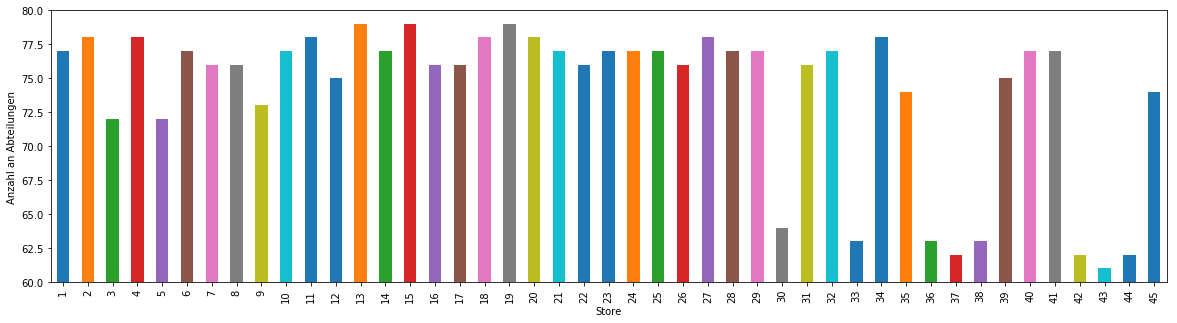

In [5]:
data_df.groupby('Store')['Dept'].nunique().plot(figsize=(20, 5), kind='bar').set_ylabel('Anzahl an Abteilungen')
plt.ylim(60, 80)
plt.show()

Wir können beobachten, dass es nicht einen einzigen Store gibt, der alle Abteilungen unter einem Dach vereint.  
__Der kleinste Store umfasst dabei {{data_df.groupby('Store')['Dept'].nunique().min()}} Abteilungen, der größte {{data_df.groupby('Store')['Dept'].nunique().max()}} Abteilungen__.

Weiterhin ist von Interesse, ob es Abteilungen gibt, die in jedem Store vorhanden sind oder eben nicht:

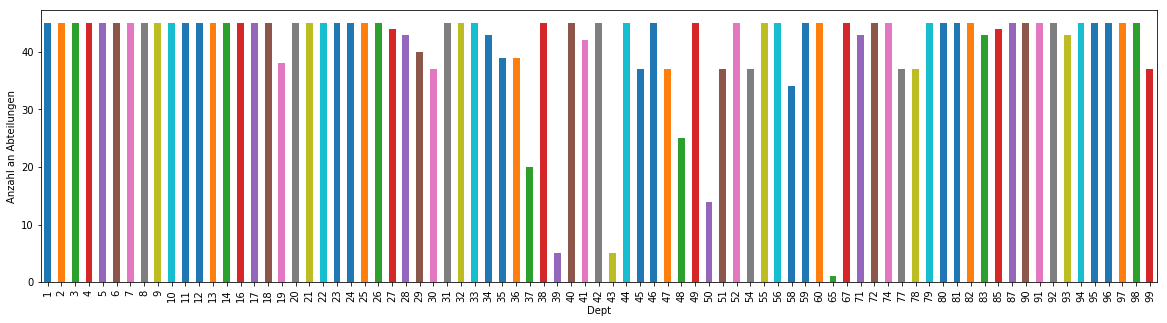

In [6]:
dept_in_stores_series = data_df.groupby('Dept')['Store'].nunique()
dept_in_stores_series.plot(figsize=(20, 5), kind='bar').set_ylabel('Anzahl an Abteilungen')
plt.show()

Insgesamt gibt es __{{dept_in_stores_series.value_counts()[45]}} Abteilungen, die in jedem Store vertreten sind__, das sind ca {{int(dept_in_stores_series.value_counts(normalize=True)[45]*100)}} Prozent aller Abteilungen.  
__Abteilung {{dept_in_stores_series[dept_in_stores_series==1].index.values[0]}} gibt es nur in einem einzigen Store__. Sie ist dabei die einzige Abteilung, die in nur einem Store existiert.

##### Date

Der älteste Messwert ist vom ```{{data_df.Date.min()}}```, der jüngste Messwert ist vom ```{{data_df.Date.max()}}```.  
Insgesamt wurde an {{data_df.Date.nunique()}} Tagen gemessen.

##### Weekly Sales

Anzahl Messpunkte:	421570
Kleinster Betrag:	-4988.94
Median:			7612.03
Durchschnitt:		15981.26
Größter Betrag:		693099.36


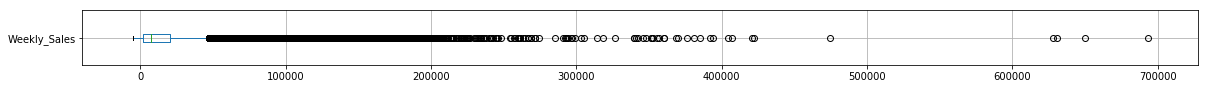

In [7]:
print("Anzahl Messpunkte:\t{}".format(data_df.Weekly_Sales.count()))
print("Kleinster Betrag:\t{}".format(data_df.Weekly_Sales.min()))
print("Median:\t\t\t{}".format(data_df.Weekly_Sales.median()))
print("Durchschnitt:\t\t{0:.2f}".format(data_df.Weekly_Sales.mean()))
print("Größter Betrag:\t\t{}".format(data_df.Weekly_Sales.max()))

pd.DataFrame(data_df.Weekly_Sales).boxplot(figsize=(20,1), vert=False)
plt.show()

__Interessant:__ es sind auch negative Werte für den Umsatz enthalten und das nicht zu knapp:  
Dieses Verhalten kann in  1285 Einzelmessungen beobachtet werden, es tritt in allen Stores und Wochen auf.  
Wie es dazu kommt wird [hier](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/discussion/7152) erklärt, es wurden in der Periode Waren für mehr Wert retourniert als gekauft.

#### Features - Datensatz

Der Datensatz ```features.csv``` enthält die Attribute ```Store```, ```Date```, ```Temperature```, ```Fuel_Price```, ```Markdown 1-5```, ```CPI```, ```Unemployment``` und ```IsHoliday```.

##### Store und Date

Nachdem die Datensätze ```train.csv``` und ```features.csv``` in einem späteren Schritt über die Attribute ```Store``` und ```Date``` gejoined werden sollen, wird hier überprüft, ob ein Inner Join ohne Verluste möglich ist:

In [8]:
data_join_df = data_df[['Store', 'Date']]

features_join_df = features_df[['Store', 'Date']]
features_join_df = features_join_df[features_join_df.Date <= data_join_df.Date.max()]

cnt_rows_without_partner = len(pd.concat([data_join_df, features_join_df]).drop_duplicates(keep=False))
print("Es wurden für {} Zeilen keine Join-Partner gefunden.".format(cnt_rows_without_partner))

Es wurden für 0 Zeilen keine Join-Partner gefunden.


Ein Join ist also ohne Verluste machbar.

##### Temperature

In [9]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature.median()))

Die niedrigste gemessene Temperatur:	-7.29
Die höchste gemessene Temperatur:	101.95
Median der Temperatur:			60.71


Nachdem Nachrichten über gekochte Amerikaner auch uns in Europa erreicht hätten, gehen wir davon aus, dass die Temperatur in Fahrenheit vorliegt.  
In einem ersten Schritt wollen wir diese umrechnen:

In [10]:
def fahr_to_celsius(temp_fahr):
    return round((temp_fahr - 32) * 5 / 9, 2)

features_df['Temperature_F'] = features_df.Temperature
features_df['Temperature_C'] = features_df.Temperature.apply(lambda tmp_fahr: fahr_to_celsius(tmp_fahr))
features_df.drop(columns=['Temperature'], inplace=True)

In [11]:
print("Die niedrigste gemessene Temperatur:\t{}".format(features_df.Temperature_C.min()))
print("Die höchste gemessene Temperatur:\t{}".format(features_df.Temperature_C.max()))
print("Median der Temperatur:\t\t\t{}".format(features_df.Temperature_C.median()))

Die niedrigste gemessene Temperatur:	-21.83
Die höchste gemessene Temperatur:	38.86
Median der Temperatur:			15.95


Diese Ergebnisse ergeben durchaus mehr Sinn aus der europäischen Perspektive.

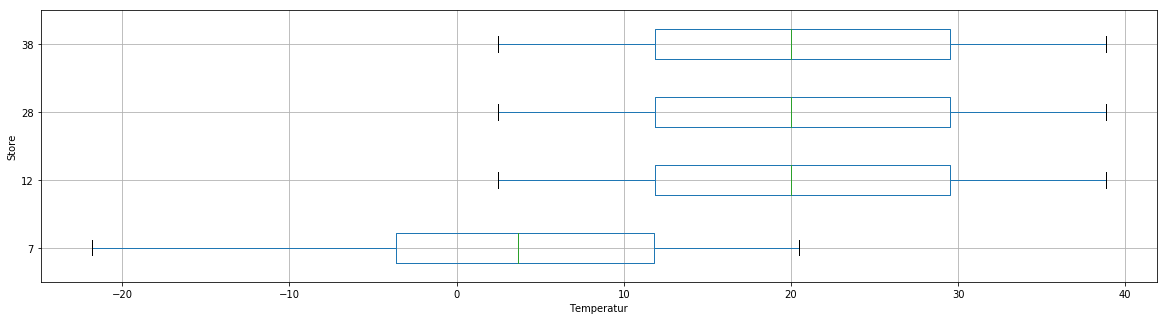

In [12]:
list_of_stores = features_df[features_df.Temperature_C == features_df.Temperature_C.min()].Store.tolist() + features_df[features_df.Temperature_C == features_df.Temperature_C.max()].Store.tolist()
temperature_store_df = pd.DataFrame()

for store in list_of_stores:
    temperature_store_df[store] = features_df.Temperature_C[features_df.Store == store].tolist()
    temperature_store_df.reset_index(drop=True, inplace=True)
    
temperature_store_df.boxplot(figsize=(20,5), vert=False)
plt.xlabel("Temperatur")
plt.ylabel("Store")
plt.show()

##### Fuel_Price

Der niedrigste Preis pro Gallone Sprit:		2.472
Der höchste Preis pro Gallone Sprit:		4.468
Median des Spritpreises pro Gallone:		3.513


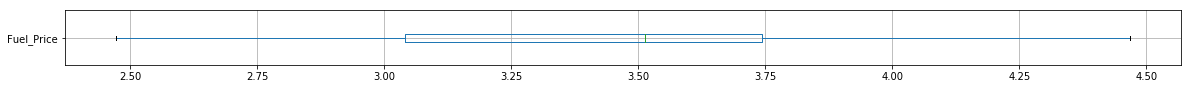

In [13]:
print("Der niedrigste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.min()))
print("Der höchste Preis pro Gallone Sprit:\t\t{}".format(features_df.Fuel_Price.max()))
print("Median des Spritpreises pro Gallone:\t\t{}".format(features_df.Fuel_Price.median()))

pd.DataFrame(features_df.Fuel_Price).boxplot(figsize=(20,1), vert=False)
plt.show()

##### MarkDown 1-5

Der Beschreibung auf [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data) entnehmen wir, dass die Werte für die Marketingaktionen erst ab November 2010 verfügbar sind. Zudem fehlen angeblich Daten für weitere Wochen.  
Nachdem wir die Werte ab September 2010 für die Prognose nutzen wollen, könnte es sein, dass die Attribute für uns wertlos sind.

Auf jeden Fall soll an dieser Stelle untersucht werden, wie es sich mit fehlenden Werten im Datensatz generell verhält:

In [14]:
pd.DataFrame(features_df.isnull().sum())

,0
Store,0
Date,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585
Unemployment,585


Wir wollen wissen, für welchen Zeitraum tatsächlich Daten der Attribute ```MarkDown 1-5``` vorhanden sind:

In [15]:
print("Erstes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.min()))
print("Letztes Datum mit allen Werten für MarkDown:\t{}".format(features_df[['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].dropna().Date.max()))

Erstes Datum mit allen Werten für MarkDown:	2011-11-11
Letztes Datum mit allen Werten für MarkDown:	2013-07-26


Nachdem wir aus den Daten von 2010 für das Weihnachtsgeschäft von 2011 lernen wollen, sind die Attribute ```MarkDown 1-5``` für uns wertlos und werden in der Phase der __Data Preparation__ entfernt.

##### CPI

Der Verbrauchspreisindex zeigt die Steigerung (oder Minderung) der Lebenshaltungskosten an.  
Dabei existieren verschiedene CPIs - mit welchem genau wir es zu tun haben und welches das Basisjahr ist, konnten wir nicht ermitteln.  
In den USA basiert der Index häufig auf den Jahren 1982 bis 1984, was für die vorliegenden Werte allerdings nicht stichhaltig aussieht.

Der niedrigste Wert des CPI:	126.064
Der höchste Wert des CPI:	228.9764563
Median des CPI:			182.7640032


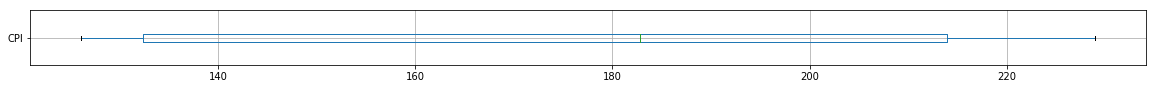

In [16]:
print("Der niedrigste Wert des CPI:\t{}".format(features_df.CPI.min()))
print("Der höchste Wert des CPI:\t{}".format(features_df.CPI.max()))
print("Median des CPI:\t\t\t{}".format(features_df.CPI.median()))

pd.DataFrame(features_df.CPI).boxplot(figsize=(20,1), vert=False)
plt.show()

Wie soeben in der Auswertung der ```MarkDown```-Attribute gesehen, fehlen auch hier Werte.  
Diese fehlenden Werte sollen in der Phase der __Data Preparation__ nachberechnet werden.

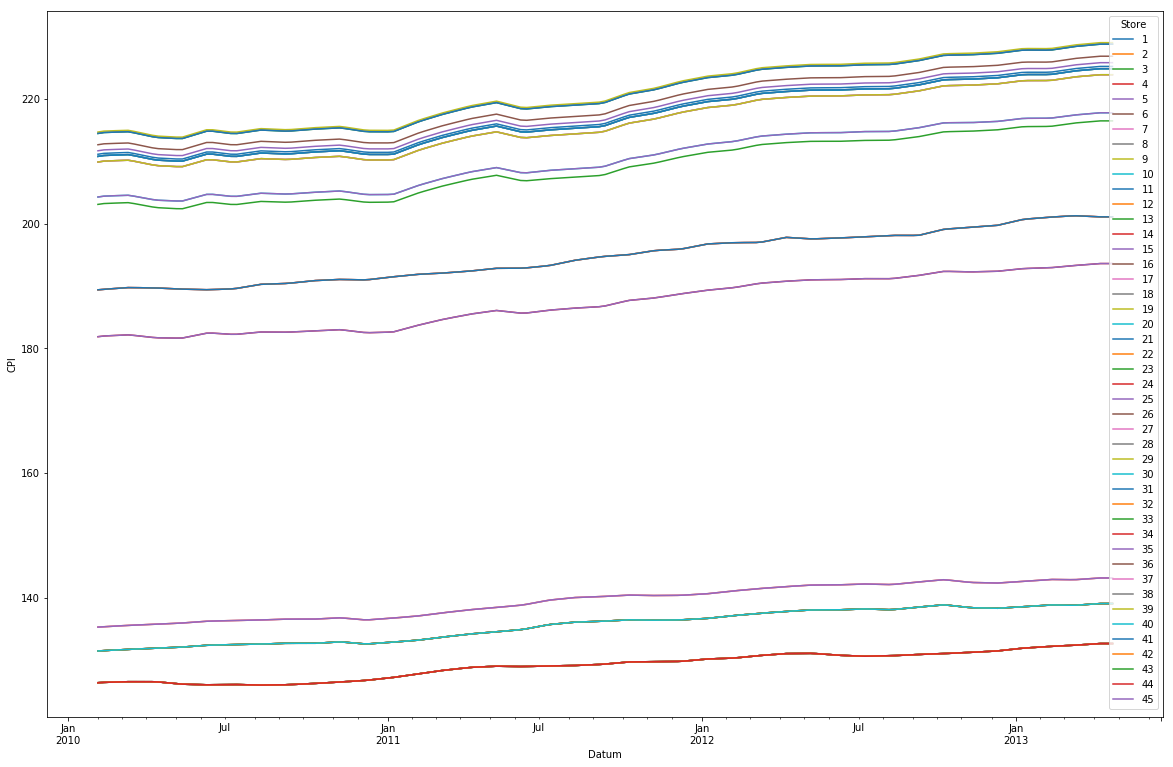

In [17]:
cpi_df = features_df.set_index(keys=['Store', 'Date'])['CPI'].unstack(level='Store')
cpi_df.index = pd.to_datetime(cpi_df.index)
cpi_df.plot(figsize=(20,13))
plt.xlabel('Datum')
plt.ylabel('CPI')
plt.show()

##### Unemployment

__TODO: hier gehts weiter!__

vgl auch mit cpi und store?

##### IsHoliday

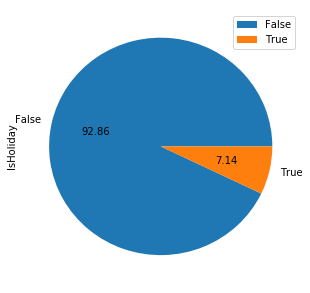

In [18]:
pd.DataFrame(features_df.IsHoliday).apply(pd.value_counts).plot.pie(figsize=(5,5), y='IsHoliday', autopct='%.2f')
plt.show()

#### Auswertung:
Der Zeitraum, in dem Markdowns erfasst worden sind, umfasst nicht alle Datenpunkte. Daher `featureDF` enthält viele leere Informationen. Die MarkDowns helfen uns an dieser Stelle nicht weiter. Mit `.dropna()` werden diese leeren Informationen aus dem Dataframe herausgeschnitten.

In [19]:
featuresDf = featuresDf.dropna()
featuresDf.head()

NameError: name 'featuresDf' is not defined

In [ ]:
featuresDf.isnull().sum()

In [ ]:
featuresDf.describe()

In [ ]:
storesDf.isnull().sum()

### Entscheidung: 
Wir wollen für unsere Arbeit mit dem Trainingsdataset arbeiten. Es enthält vorerst alle wichtigen Informationen und ist geeignet, um durch weitere Daten erweitert zu werden. 

### Analyse: wollen wir evtl noch weitere externe Daten einbeziehen?

__TODO:__ 
+ eine andere Quelle wäre evtl ganz cool, aber nur, wenn uns was leichtes einfällt

## DATA PREPARATION: was wollen wir verwenden und wie?

### zeitlicher Zuschnitt der Daten auf das Projektziel

__TODO:__ 
+ warum wir nicht einfach mit allen Daten arbeiten
+ weshalb wir die Monate ausgewählt haben, die wir ausgewählt haben

+ MarkDown rauswerfen
+ CPI auffüllen

__TODO:__ 
+ Begründung, warum wir manuell spliten

In [ ]:
data_df.Date = pd.to_datetime(data_df.Date)
display(data_df.dtypes)

In [ ]:
train_df = data_df[((data_df.Date >= '2010-09-01') & (data_df.Date <= '2010-12-31')) | ((data_df.Date >= '2011-09-01') & (data_df.Date <= '2011-11-30'))]
train_df.reset_index(inplace=True, drop=True)

In [ ]:
train_df.loc[(train_df['Store'] == 1) & (train_df['Dept'] ==1)]

In [ ]:
test_df = data_df[(data_df.Date >= '2011-12-01') & (data_df.Date <= '2011-12-31')]
test_df.reset_index(inplace=True, drop=True)

In [ ]:
test_df.loc[(test_df['Store'] == 1) & (test_df['Dept'] ==1)]

In [ ]:
train_df.head()

In [ ]:
train_df.plot(x='Date', y='Weekly_Sales', figsize=(15,10), secondary_y='Dept')

In [ ]:
train_df.groupby('Date').agg(['sum']).reset_index().plot(x='Date', y='Weekly_Sales',kind="bar", figsize=(12,7)).set_ylabel("Weekly Sales in 10 mio.")
plt.show()

__TODO:__ 
+ Ergebnisbeschreibung, warum wir denken, hier evtl weiterzukommen

### inhaltlicher Zuschnitt der Daten aufs Projektziel

__TODO:__ 
+ Feature Selection
+ Feature Enigneering
    + Delta zur Vorwoche oder länger --> negative Sales!

__TODO:__ 
+ kurze Erklärung, was in diesem Kapitel passieren soll

### hier auf Sliding Window eingehen?

__TODO:__ 
+ irgendwo müssen wir erklären, was das ist und wie es geht. 
+ am besten evtl hier, so hat man nicht am anfang nur theorie. 
+ und dann gleich mit python umsetzen. 
+ ein tutorial (weiß nciht, obs was taugt): [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

## MODELING

__TODO:__ 
+ Hier wollen wir sowohl mit Baum, als auch mit Netz arbeiten. 
+ Wir sollten mit der Grafik von scikit-learn begründen, warum wir welche Technik nutzen [hatten wir schonmal](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
Zusätzliche Informationen: https://data-science-blog.com/blog/2016/04/26/machine-learning-mit-python-tutorial-minimalbeispiel/

Fragen zur Begründung:
+ wieviele Examples haben wir?


In [ ]:
#DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=2)
featImp=clf.feature_importance_
#Comparing feature importance od dt with other feature importance metrics
chi2_all,p_all=chi2(X,y)
f_all,p_all=f_classif(X,y)
mi_all=mutual_info_classif(X,y,discrete_features=True)
impdf=pd.DataFrame(index=catFeatureList,columns=['DecTree','chi2','F classif','Pval','Mutual Inf'])
impdf['DecTree']=clf.feature_importances_
impdf['chi2']=chi2_all
impdf['F classif']=f_all
impdf['Pval']=p_all
impdf['Mutual Inf']=mi_all
display(impdf)

In [ ]:
#DecisionTreeRegression
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
predTree = dt_model.predict(X_test)
predTree[0:5]
#Model
#The model
plt.scatter(y_test, predTree)
print("Accuracy Score: ", dt_model.score(X_test, y_test))

__TODO:__ Ich würde hier vielleicht vergleichen, inwiefern ein GradientBoostingRegressor weiterführen kann. => Addtional Feature

__TODO:__ Unterschiede herausarbeiten und darstellen => Welche Kennzahlen sind hier am ausschlaggebenden?

In [ ]:
#Neuronales Netz

## EVALUATION

__TODO:__ 
+ was sind hier gute maßzahlen?

## DEPLOYMENT

__TODO:__ 
+ brauchen wir den schritt überhaupt?
+ evtl stattdessen einfach: __LESSONS LEARNED__ und __IDEEN FÜR DIE ZUKUNFT__ machen oder so

# Deanonymisierung

https://en.wikipedia.org/wiki/User:Michael_J/County_table

Neben Wetterdaten auch die A-lo-Quote nutzen?

Hilfe evtl bei Kreditkarten-Analyse